In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.svm import SVC

import xgboost as xgb

from sklearn.metrics import f1_score

from sklearn.metrics import classification_report, confusion_matrix

import warnings

import pickle

In [ ]:
# Reading the csv data

df = pd.read_csv('/content/project dataset file.csv', compression=None, encoding='latin1')

In [ ]:
import os

# List files in the /content/ directory
print(os.listdir('/content/'))

['.config', 'project dataset file.csv', 'sample_data']


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
192588,13,CASH_IN,408313.37,C437943627,3441357.55,3849670.91,C1970559605,694470.70,286157.33,0.0
192589,13,CASH_IN,132941.53,C248425845,3849670.91,3982612.44,C1721892488,2565275.25,2432333.72,0.0
192590,13,CASH_IN,189213.75,C960327564,3982612.44,4171826.19,C1495001462,4851384.58,5424905.46,0.0
192591,13,CASH_IN,154029.98,C1300187685,4171826.19,4325856.17,C729214165,1211596.13,1057566.15,0.0


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
192588,13,CASH_IN,408313.37,C437943627,3441357.55,3849670.91,C1970559605,694470.70,286157.33,0.0
192589,13,CASH_IN,132941.53,C248425845,3849670.91,3982612.44,C1721892488,2565275.25,2432333.72,0.0
192590,13,CASH_IN,189213.75,C960327564,3982612.44,4171826.19,C1495001462,4851384.58,5424905.46,0.0
192591,13,CASH_IN,154029.98,C1300187685,4171826.19,4325856.17,C729214165,1211596.13,1057566.15,0.0
192592,13,CASH_IN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.style.use("ggplot")

warnings.filterwarnings("ignore")

In [ ]:
# checking for correlation

df.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.050839,-0.005591,-0.004938,0.024132,0.008619,-0.040786
amount,0.050839,1.000000,-0.020133,-0.024358,0.222686,0.347191,0.034266
oldbalanceOrg,-0.005591,-0.020133,1.000000,0.998954,0.096791,0.065624,-0.002900
newbalanceOrig,-0.004938,-0.024358,0.998954,1.000000,0.098391,0.064658,-0.008508
oldbalanceDest,0.024132,0.222686,0.096791,0.098391,1.000000,0.951121,-0.008207
newbalanceDest,0.008619,0.347191,0.065624,0.064658,0.951121,1.000000,-0.005323
isFraud,-0.040786,0.034266,-0.002900,-0.008508,-0.008207,-0.005323,1.000000


<Axes: >

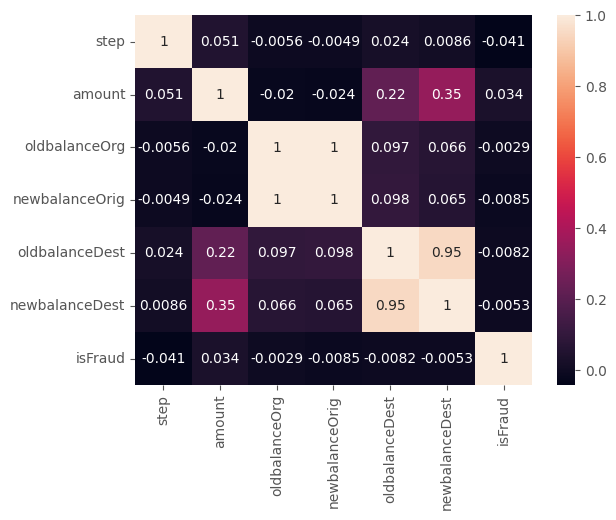

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='step', ylabel='Count'>

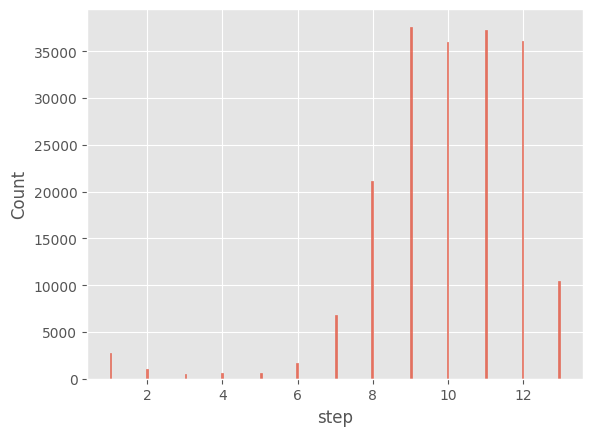

In [ ]:
#step
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

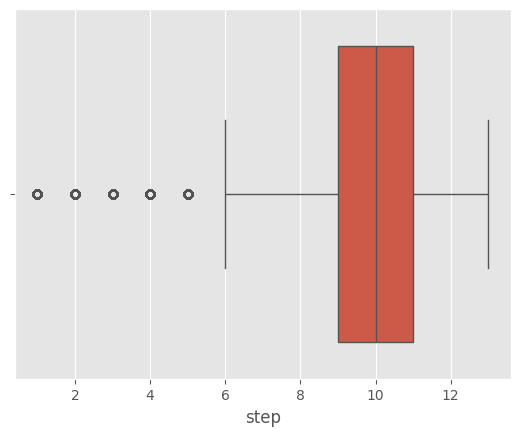

In [ ]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='step', ylabel='count'>

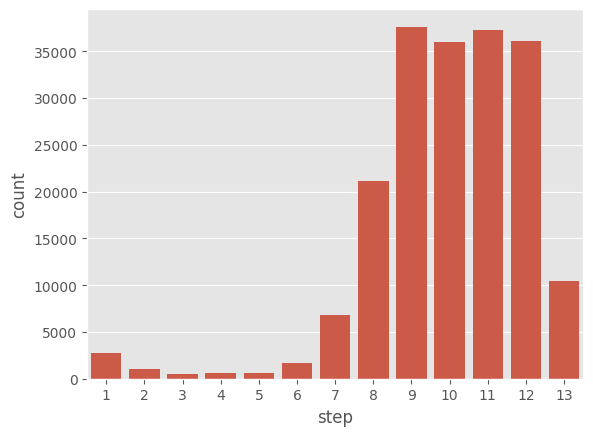

In [ ]:
#type
sns.countplot(data=df,x='step')

<Axes: xlabel='amount', ylabel='Count'>

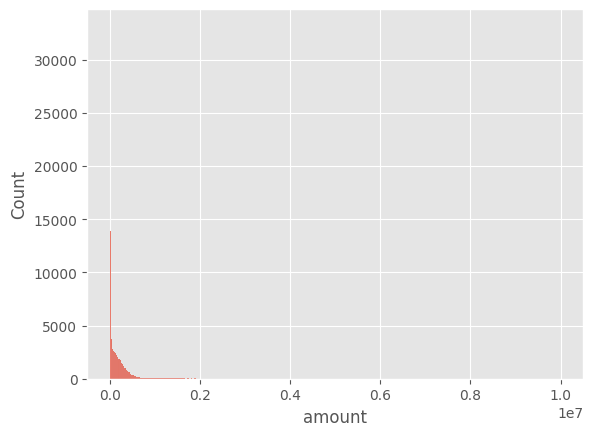

In [ ]:
#amount
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

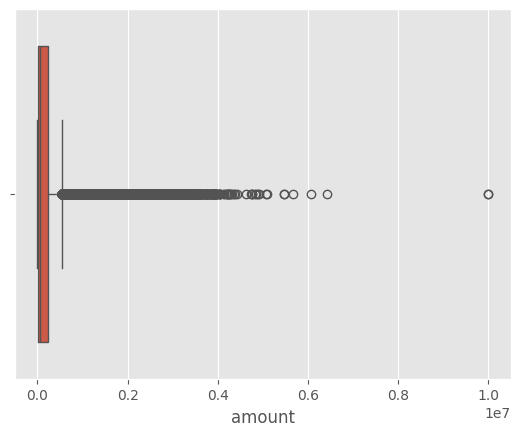

In [ ]:
#amount
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

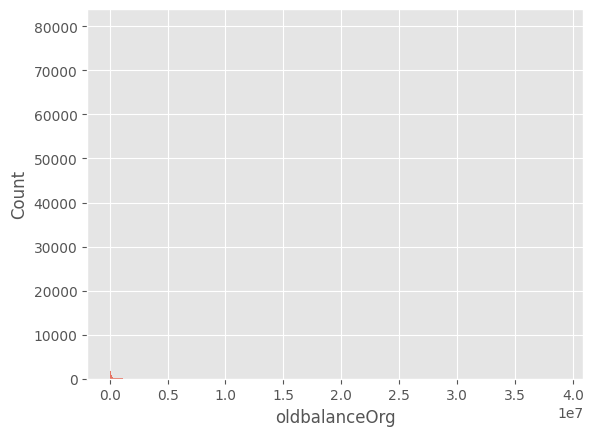

In [ ]:
#oldbalanceorg
sns.histplot(data=df,x='oldbalanceOrg')

In [ ]:
#nameDest
df['nameDest'].value_counts()

,count
nameDest,
C985934102,84
C1286084959,80
C248609774,75
C1590550415,74
C2083562754,74
...,...
M1243145205,1
M1003500779,1
M178045180,1


<Axes: xlabel='oldbalanceDest'>

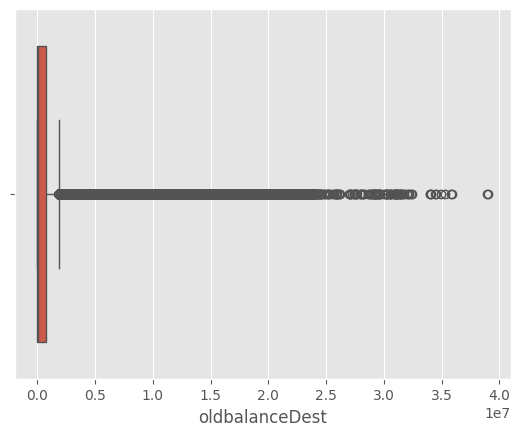

In [ ]:
#oldbalanceDest
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

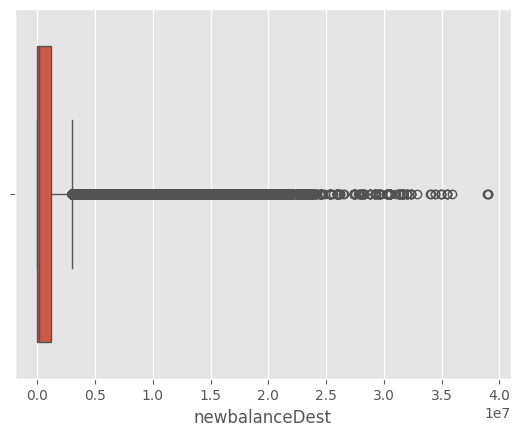

In [ ]:
#newbalanceDest
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

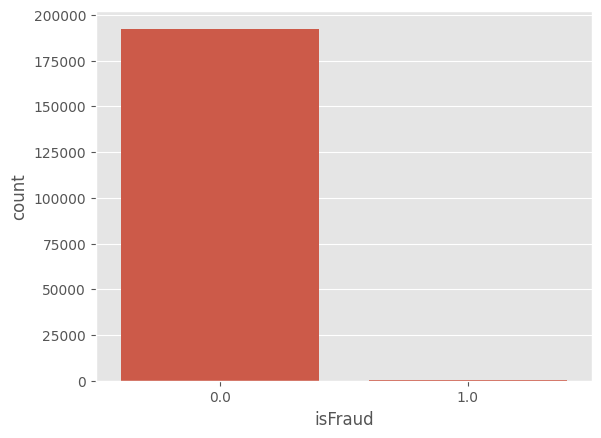

In [ ]:
#isFraud:
sns.countplot(data=df,x='isFraud')

In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,192449
1.0,143


In [ ]:
df.loc[df['isFraud']==0,'isFraud']='is not fraud'
df.loc[df['isFraud']==1,'isFraud']='is fraud'

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,is fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,is fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not fraud
...,...,...,...,...,...,...,...,...,...,...
192588,13,CASH_IN,408313.37,C437943627,3441357.55,3849670.91,C1970559605,694470.70,286157.33,is not fraud
192589,13,CASH_IN,132941.53,C248425845,3849670.91,3982612.44,C1721892488,2565275.25,2432333.72,is not fraud
192590,13,CASH_IN,189213.75,C960327564,3982612.44,4171826.19,C1495001462,4851384.58,5424905.46,is not fraud
192591,13,CASH_IN,154029.98,C1300187685,4171826.19,4325856.17,C729214165,1211596.13,1057566.15,is not fraud


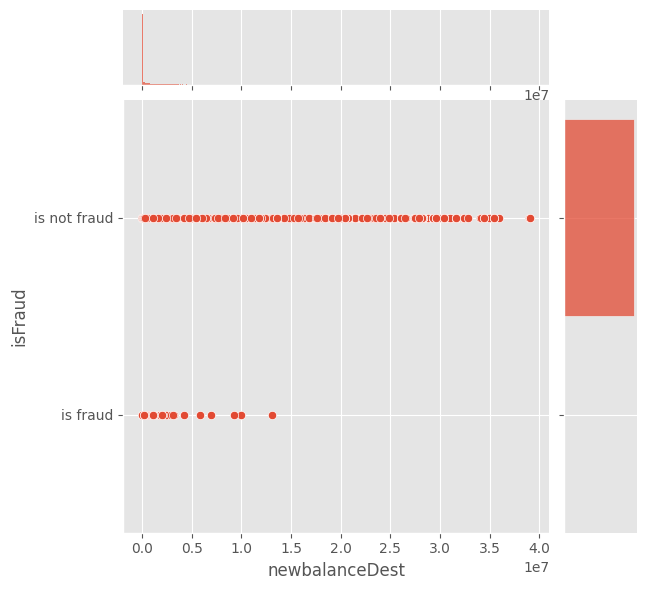

In [ ]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

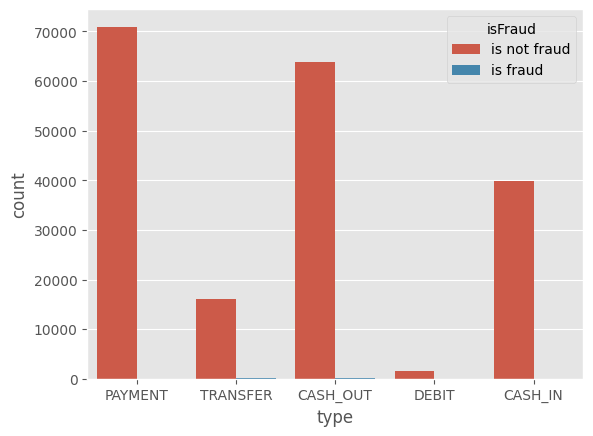

In [ ]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

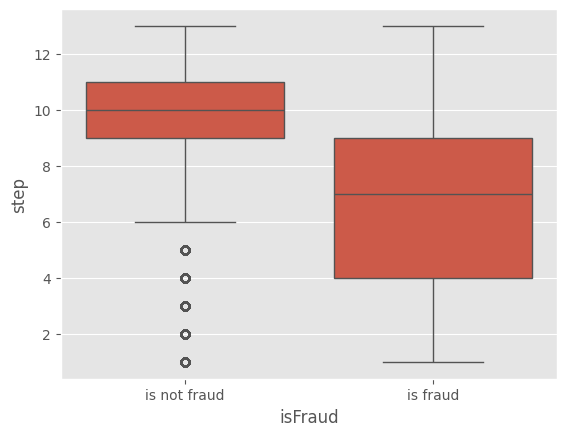

In [ ]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

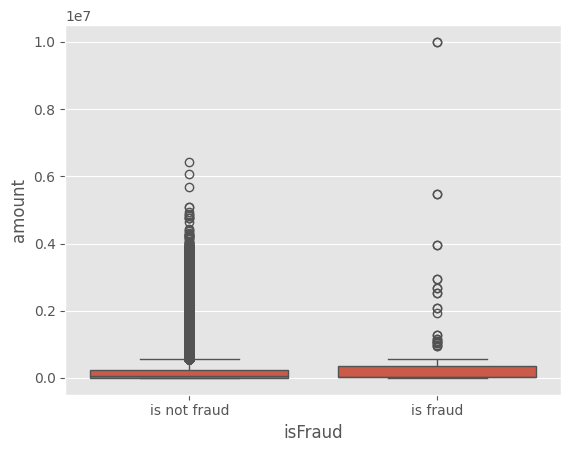

In [ ]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

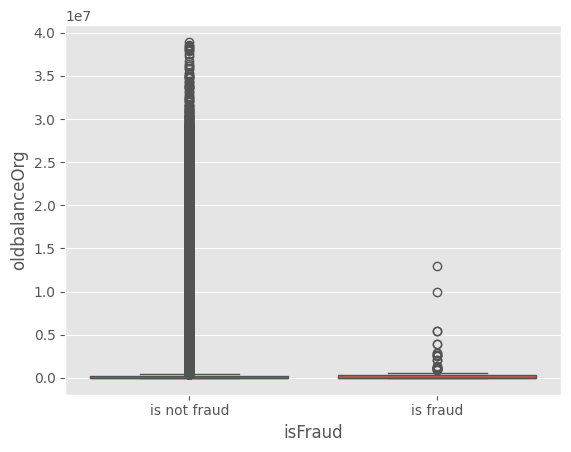

In [ ]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

# New Section

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

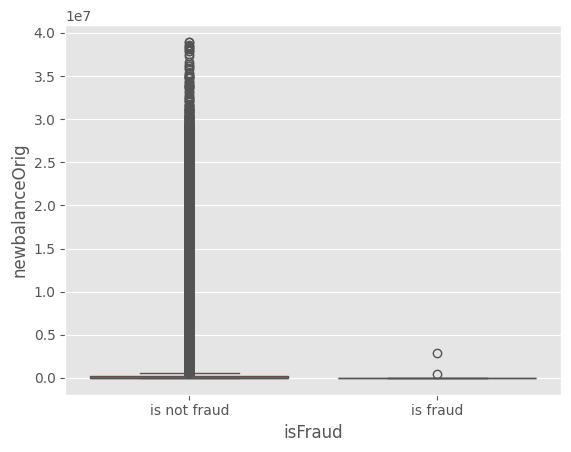

In [ ]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

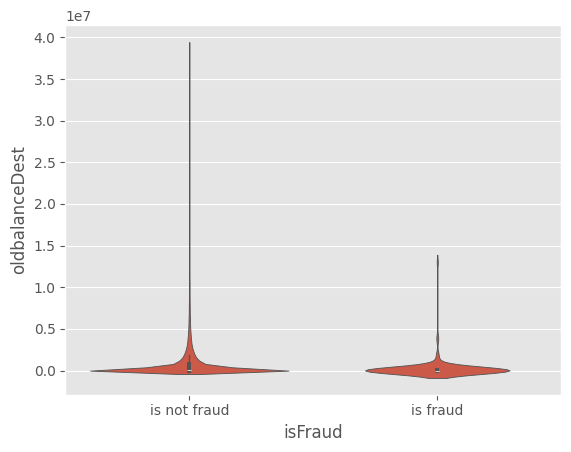

In [ ]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

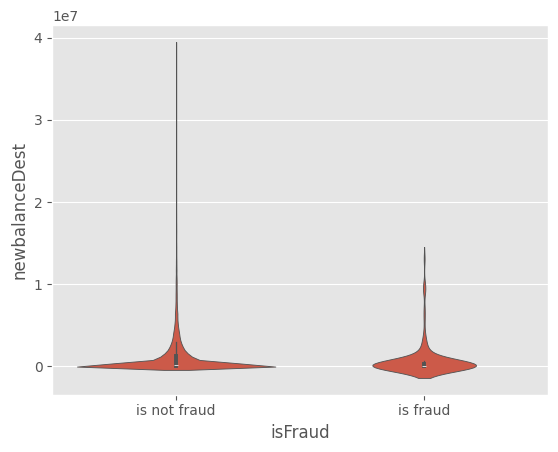

In [ ]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

In [ ]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,192593.000000,192593,1.925930e+05,192592,1.925920e+05,1.925920e+05,192592,1.925920e+05,1.925920e+05,192592
unique,NaN,5,NaN,192589,NaN,NaN,91743,NaN,NaN,2
top,NaN,PAYMENT,NaN,C260230637,NaN,NaN,C985934102,NaN,NaN,is not fraud
freq,NaN,70958,NaN,2,NaN,NaN,84,NaN,NaN,192449
mean,9.953046,NaN,1.808083e+05,NaN,8.856633e+05,9.035205e+05,NaN,9.373857e+05,1.192429e+06,NaN
std,2.081126,NaN,3.308757e+05,NaN,2.781981e+06,2.819402e+06,NaN,2.371167e+06,2.661279e+06,NaN
min,1.000000,NaN,3.200000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,9.000000,NaN,1.192803e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,10.000000,NaN,6.795119e+04,NaN,1.945550e+04,0.000000e+00,NaN,4.977150e+04,1.288272e+05,NaN
75%,11.000000,NaN,2.286971e+05,NaN,1.929185e+05,2.282370e+05,NaN,7.564436e+05,1.186557e+06,NaN


In [ ]:
# shape of csv data
df.shape

(192593, 10)

In [ ]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/project dataset file.csv', compression=None, encoding='latin1')

In [ ]:
#Finding null values

df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192593 entries, 0 to 192592
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            192593 non-null  int64  
 1   type            192593 non-null  object 
 2   amount          192593 non-null  float64
 3   nameOrig        192592 non-null  object 
 4   oldbalanceOrg   192592 non-null  float64
 5   newbalanceOrig  192592 non-null  float64
 6   nameDest        192592 non-null  object 
 7   oldbalanceDest  192592 non-null  float64
 8   newbalanceDest  192592 non-null  float64
 9   isFraud         192592 non-null  float64
 10  isFlaggedFraud  192592 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 16.2+ MB


<Axes: ylabel='amount'>

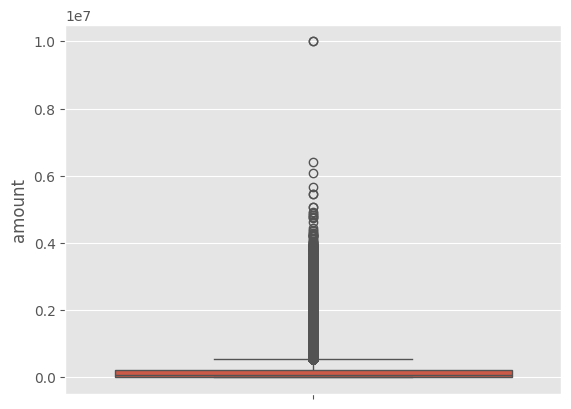

In [ ]:
import seaborn as sns
sns.boxplot(df['amount'])

In [ ]:
import numpy as np
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=np.float64(2367.99), count=np.int64(3))
180808.3209581345


In [ ]:
q1=np.quantile (df['amount'], 0.25)
q3=np.quantile (df['amount'], 0.75)

IQR=q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

print('q1:',q1)
print('q3:',q3)
print('IQR:', IQR)
print('Upper Bound:', upper_bound)
print('Lower Bound:', lower_bound)
print('Skewed data', len (df[df['amount']>upper_bound]))
print('Skewed data', len (df[df['amount']<lower_bound]))

q1: 11928.03
q3: 228697.14
IQR: 216769.11000000002
Upper Bound: 553850.805
Lower Bound: -313225.635
Skewed data 11547
Skewed data 0


In [ ]:
#To handle outliers transformation techniques are used.
def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature, plot=plt)

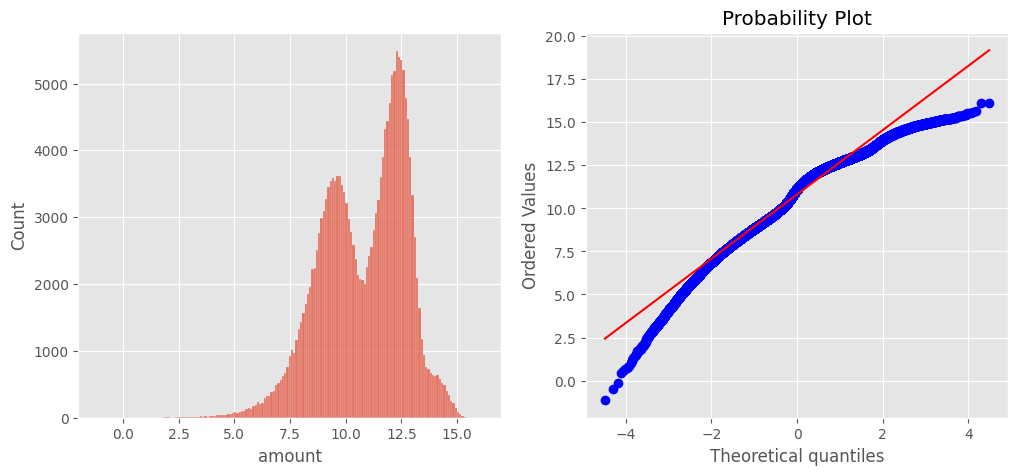

In [ ]:
import matplotlib.pyplot as plt
transformationPlot(np.log(df['amount']))

In [ ]:
import numpy as np
df['amount']=np.log(df['amount'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

In [ ]:
df['type'].value_counts()

,count
type,
3,70958
1,63918
0,39913
4,16165
2,1639


In [ ]:
x = df.drop('isFraud',axis=1)

y = df['isFraud']

In [ ]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9.194174,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0
1,1,3,7.530630,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0
2,1,4,5.198497,C1305486145,181.00,0.00,C553264065,0.00,0.00,0.0
3,1,1,5.198497,C840083671,181.00,0.00,C38997010,21182.00,0.00,0.0
4,1,3,9.364617,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
192588,13,0,12.919790,C437943627,3441357.55,3849670.91,C1970559605,694470.70,286157.33,0.0
192589,13,0,11.797665,C248425845,3849670.91,3982612.44,C1721892488,2565275.25,2432333.72,0.0
192590,13,0,12.150633,C960327564,3982612.44,4171826.19,C1495001462,4851384.58,5424905.46,0.0
192591,13,0,11.944903,C1300187685,4171826.19,4325856.17,C729214165,1211596.13,1057566.15,0.0


In [ ]:
y

,isFraud
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
192588,0.0
192589,0.0
192590,0.0
192591,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

NameError: name 'x' is not defined

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(154074, 10)
(38519, 10)
(38519,)
(154074,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9995326981489654

In [ ]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict1)

col_0,0,1
isFraud,,
0,38490,2
1,16,11


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38492
           1       0.85      0.41      0.55        27

    accuracy                           1.00     38519
   macro avg       0.92      0.70      0.77     38519
weighted avg       1.00      1.00      1.00     38519



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9992471247955554

In [ ]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict2)

col_0,0,1
isFraud,,
0,38479,13
1,16,11


In [ ]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38492
           1       0.46      0.41      0.43        27

    accuracy                           1.00     38519
   macro avg       0.73      0.70      0.72     38519
weighted avg       1.00      1.00      1.00     38519



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy

0.9995067369350191

In [ ]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict3)

col_0,0,1
isFraud,,
0,38492,0
1,19,8


In [ ]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38492
           1       1.00      0.30      0.46        27

    accuracy                           1.00     38519
   macro avg       1.00      0.65      0.73     38519
weighted avg       1.00      1.00      1.00     38519



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)

y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9992990472234482

In [ ]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9992665814256878

In [ ]:
pd.crosstab(y_test,y_test_predict4)

col_0,0
isFraud,
0,38492
1,27


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38492
           1       0.00      0.00      0.00        27

    accuracy                           1.00     38519
   macro avg       0.50      0.50      0.50     38519
weighted avg       1.00      1.00      1.00     38519



In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [ ]:
y_test1=la.transform(y_test)

In [ ]:
y_test1=la.transform(y_test)

In [ ]:
y_test1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_train1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train, y_train1)

y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy

0.9996105817908045

In [ ]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

0.9999870191402777

In [ ]:
pd.crosstab(y_test1,y_test_predict5)

col_0,0,1
row_0,,
0,38490,2
1,13,14


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38492
           1       0.88      0.52      0.65        27

    accuracy                           1.00     38519
   macro avg       0.94      0.76      0.83     38519
weighted avg       1.00      1.00      1.00     38519



In [ ]:
def compareModel():
    print("train accuracy for rfc",accuracy_score(y_train_predict1,y_train))
    print("test accuracy for rfc",accuracy_score(y_test_predict1,y_test))
    print("train accuracy for dtc",accuracy_score(y_train_predict2,y_train))
    print("test accuracy for dtc",accuracy_score(y_test_predict2,y_test))
    print("train accuracy for etc",accuracy_score(y_train_predict3,y_train))
    print("test accuracy for etc",accuracy_score(y_test_predict3,y_test))
    print("train accuracy for svc",accuracy_score (y_train_predict4,y_train))
    print("test accuracy for svcc",accuracy_score(y_test_predict4,y_test))
    print("train accuracy for xgb1",accuracy_score(y_train_predict5,y_train1))
    print("test accuracy for xgb1",accuracy_score(y_test_predict5,y_test1))

In [ ]:
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.9995326981489654
train accuracy for dtc 1.0
test accuracy for dtc 0.9992471247955554
train accuracy for etc 1.0
test accuracy for etc 0.9995067369350191
train accuracy for svc 0.9992665814256878
test accuracy for svcc 0.9992990472234482
train accuracy for xgb1 0.9999870191402777
test accuracy for xgb1 0.9996105817908045


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Reload df and apply preprocessing steps to ensure consistency
df = pd.read_csv('/content/project dataset file.csv', compression=None, encoding='latin1')

# Drop 'isFlaggedFraud' column as per previous notebook steps
df.drop(['isFlaggedFraud'], axis=1, inplace=True)

# Drop 'nameOrig' and 'nameDest' columns as they are categorical and have high cardinality
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Handle missing values by dropping rows with NaN, as some models cannot handle them
df.dropna(inplace=True)

# Apply log transformation to 'amount' column as per previous notebook steps
df['amount'] = np.log(df['amount'])

# Label encode 'type' column as per previous notebook steps
la_type = LabelEncoder()
df['type'] = la_type.fit_transform(df['type'])

# Define feature matrix X and target vector y
x = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

# Initialize and train the SVC model
svc = SVC()
svc.fit(x_train, y_train)

# Make predictions and calculate accuracy
y_test_predict4 = svc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict4)
test_accuracy

0.999421581439191

In [ ]:
y_train_predict4=svc.predict(x_train)

train_accuracy=accuracy_score(y_train,y_train_predict4)

train_accuracy

0.9993412314152277

In [6]:
import pickle

pickle.dump(svc,open('payments.pkl','wb'))